In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

# Assigning Filepaths

In [2]:
train_image_dir = Path('../input/cnfood-241/train600x600')
val_image_dir = Path('../input/cnfood-241/val600x600')
test_image_dir = Path('../input/fooddataset/Food')

# Creating File DataFrame for Train Data

In [3]:
train_filepaths = list(train_image_dir.glob(r'**/*.jpg'))
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_filepaths))

train_filepaths = pd.Series(train_filepaths, name='Filepath').astype(str)
train_labels = pd.Series(train_labels, name='Label')

train_images = pd.concat([train_filepaths, train_labels], axis=1)

category_samples = []
for category in train_images['Label'].unique():
    category_slice = train_images.query("Label == @category")
    max_samples = min(125, category_slice.shape[0])
    category_samples.append(category_slice.sample(max_samples, random_state=1))
train_image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [4]:
train_image_df

,Filepath,Label
0,../input/cnfood-241/train600x600/127/000296.jpg,127
1,../input/cnfood-241/train600x600/099/000425.jpg,099
2,../input/cnfood-241/train600x600/095/000313.jpg,095
3,../input/cnfood-241/train600x600/072/000239.jpg,072
4,../input/cnfood-241/train600x600/078/000034.jpg,078
...,...,...
29879,../input/cnfood-241/train600x600/237/124.28209...,237
29880,../input/cnfood-241/train600x600/000/000219.jpg,000
29881,../input/cnfood-241/train600x600/075/000704.jpg,075
29882,../input/cnfood-241/train600x600/183/000539.jpg,183


# Creating File DataFrame for Validation Data

In [5]:
val_filepaths = list(val_image_dir.glob(r'**/*.jpg'))
val_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], val_filepaths))

val_filepaths = pd.Series(val_filepaths, name='Filepath').astype(str)
val_labels = pd.Series(val_labels, name='Label')

val_images = pd.concat([val_filepaths, val_labels], axis=1)

category_samples = []
for category in val_images['Label'].unique():
    category_slice = val_images.query("Label == @category")
    max_samples = min(50, category_slice.shape[0])
    category_samples.append(category_slice.sample(max_samples, random_state=1))
val_image_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [6]:
val_image_df

,Filepath,Label
0,../input/cnfood-241/val600x600/136/000008.jpg,136
1,../input/cnfood-241/val600x600/125/000097.jpg,125
2,../input/cnfood-241/val600x600/112/000018.jpg,112
3,../input/cnfood-241/val600x600/014/000035.jpg,014
4,../input/cnfood-241/val600x600/014/000050.jpg,014
...,...,...
10322,../input/cnfood-241/val600x600/071/000047.jpg,071
10323,../input/cnfood-241/val600x600/063/000062.jpg,063
10324,../input/cnfood-241/val600x600/016/000130.jpg,016
10325,../input/cnfood-241/val600x600/108/000045.jpg,108


# Creating File DataFrame for Test Data

In [7]:
test_filepaths = list(test_image_dir.glob(r'**/*.jpg*'))
test_filepaths.extend(list(test_image_dir.glob(r'**/*.png*')))
test_filepaths = pd.Series(test_filepaths, name='Filepath').astype(str)
test_image_df = pd.concat([test_filepaths], axis=1)

In [8]:
test_image_df

,Filepath
0,../input/fooddataset/Food/20170521_091328.jpg
1,../input/fooddataset/Food/IMG_5028.jpg
2,../input/fooddataset/Food/IMG_9594.jpg
3,../input/fooddataset/Food/IMG_7895.jpg
4,../input/fooddataset/Food/marine iguana huntin...
...,...
663,../input/fooddataset/Food/IMG_7004.png
664,../input/fooddataset/Food/IMG_7003.png
665,../input/fooddataset/Food/IMG_5940.png
666,../input/fooddataset/Food/IMG_7007.png


In [9]:
train_image_df['Label'].value_counts()
val_image_df['Label'].value_counts()

136    50
188    50
068    50
013    50
119    50
       ..
211    13
109    12
186    11
213    11
169     4
Name: Label, Length: 241, dtype: int64

# Creating Generators

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [11]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_images = val_generator.flow_from_dataframe(
    dataframe=val_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_image_df,
    x_col='Filepath',
    y_col=None,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False,
    validate_filenames=False
)

Found 29884 validated image filenames belonging to 241 classes.
Found 10327 validated image filenames belonging to 241 classes.
Found 668 non-validated image filenames.


# Modeling

In [12]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [13]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(241, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

# Training

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
934/934 [==============================] - 419s 445ms/step - loss: 3.3245 - accuracy: 0.2341 - val_loss: 2.9807 - val_accuracy: 0.2830
Epoch 2/100
934/934 [==============================] - 158s 170ms/step - loss: 2.6149 - accuracy: 0.3620 - val_loss: 2.7933 - val_accuracy: 0.3255
Epoch 3/100
934/934 [==============================] - 159s 170ms/step - loss: 2.3115 - accuracy: 0.4232 - val_loss: 2.7580 - val_accuracy: 0.3350
Epoch 4/100
934/934 [==============================] - 157s 168ms/step - loss: 2.1010 - accuracy: 0.4637 - val_loss: 2.7500 - val_accuracy: 0.3449
Epoch 5/100
934/934 [==============================] - 161s 172ms/step - loss: 1.9238 - accuracy: 0.5051 - val_loss: 2.8282 - val_accuracy: 0.3435
Epoch 6/100
934/934 [==============================] - 169s 181ms/step - loss: 1.7595 - accuracy: 0.5376 - val_loss: 2.8696 - val_accuracy: 0.3464
Epoch 7/100
934/934 [==============================] - 156s 167ms/step - loss: 1.6149 - accuracy: 0.5699 - val_loss: 2

# Results

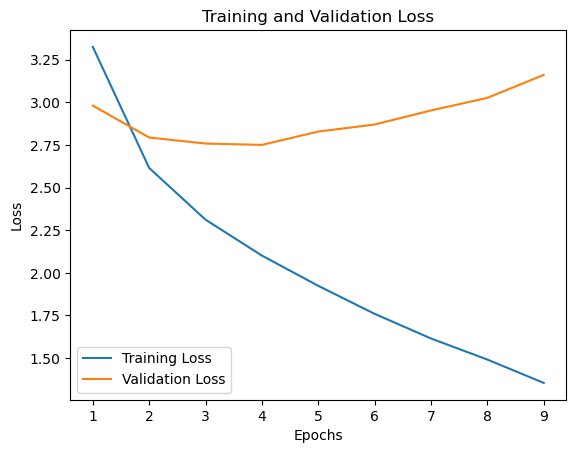

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

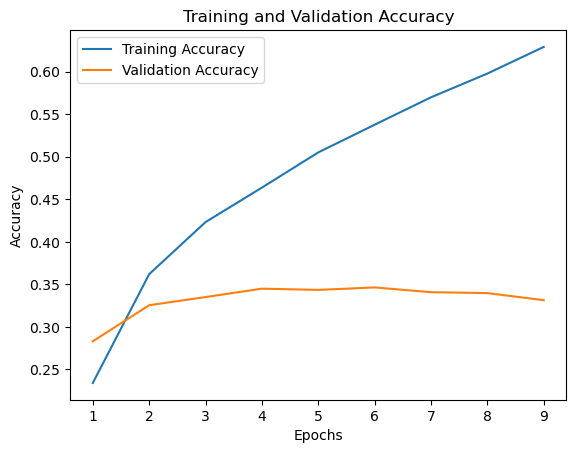

In [18]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Accuracy')
plt.plot(epochs, val_loss, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Predictions

In [19]:
predictions = np.argmax(model.predict(test_images), axis=1).tolist()

21/21 [==============================] - 55s 3s/step


In [20]:
predictions

[131,
 156,
 64,
 204,
 12,
 124,
 133,
 119,
 210,
 230,
 194,
 7,
 92,
 124,
 201,
 123,
 204,
 124,
 14,
 126,
 74,
 57,
 178,
 202,
 226,
 142,
 136,
 146,
 127,
 226,
 51,
 2,
 138,
 142,
 57,
 185,
 158,
 226,
 133,
 64,
 226,
 116,
 36,
 184,
 133,
 172,
 31,
 193,
 204,
 142,
 171,
 51,
 51,
 127,
 226,
 43,
 51,
 3,
 127,
 204,
 226,
 127,
 141,
 12,
 124,
 12,
 65,
 204,
 23,
 27,
 201,
 141,
 161,
 225,
 126,
 226,
 185,
 99,
 199,
 131,
 185,
 127,
 204,
 22,
 226,
 204,
 204,
 205,
 166,
 204,
 64,
 107,
 14,
 230,
 226,
 6,
 225,
 133,
 126,
 119,
 204,
 183,
 134,
 226,
 185,
 192,
 204,
 125,
 51,
 211,
 170,
 230,
 188,
 126,
 154,
 205,
 173,
 27,
 166,
 27,
 84,
 61,
 126,
 161,
 159,
 204,
 168,
 124,
 194,
 226,
 225,
 51,
 215,
 132,
 113,
 225,
 3,
 14,
 113,
 151,
 199,
 205,
 51,
 142,
 234,
 176,
 64,
 14,
 63,
 64,
 53,
 171,
 185,
 189,
 138,
 83,
 205,
 127,
 140,
 207,
 129,
 139,
 64,
 151,
 64,
 226,
 3,
 173,
 126,
 64,
 88,
 204,
 46,
 113,
 184,
 232,

In [21]:
class_names = pd.read_csv('/kaggle/input/cnfood-241/class_names.xlsx - Sheet1.csv')
class_names = class_names['English Name of Dish']

In [22]:
class_names

0                    Mapo Tofu
1      Home style sauteed Tofu
2                   Fried Tofu
3                    Bean curd
4                  Stinky tofu
                ...           
236    Shrimp tail with garlic
237              edamame beans
238             Sugar oil cake
239        Preserved egg salad
240              clay pot rice
Name: English Name of Dish, Length: 241, dtype: object

In [23]:
for i in range(len(predictions)):
    predictions[i] = class_names[predictions[i]]

In [24]:
predictions

['Omelette',
 'Sichuan noodles with peppery sauce',
 'Roast goose',
 'ice cream',
 'Mashed garlic eggplant',
 'Oysters',
 'Steamed Pork Dumplings',
 'Shrimp Duplings',
 'Egg steamed meat pie',
 'Coconut Chicken',
 'Golden meat rolls',
 'Pan fried potato',
 'Sauteed Shredded Pork in Sweet Bean Sauce',
 'Oysters',
 'cookies',
 'Scallop in Shell',
 'ice cream',
 'Oysters',
 'Spicy cabbage',
 'Abalone',
 'Fried chicken drumsticks',
 'Steamed pork with rice powder',
 'Hot and Sour Soup',
 'Soda biscuit',
 'Twist',
 'Leek box',
 'Egg pie cake',
 'Pumpkin cakes',
 'Crab',
 'Twist',
 'Scrambled Egg with Leek',
 'Fried Tofu',
 'Poached Egg',
 'Leek box',
 'Steamed pork with rice powder',
 'Corn and sparerib soup',
 'fried noodles',
 'Twist',
 'Steamed Pork Dumplings',
 'Roast goose',
 'Twist',
 'Braised Shrimp in chili oil',
 'Fried Yam',
 'Seaweed tofu soup',
 'Steamed Pork Dumplings',
 'Rice',
 'Black fungus salad',
 'Mala xiang guo',
 'ice cream',
 'Leek box',
 'Rice congee',
 'Scrambled Egg

In [25]:
predictionsSeries = pd.Series(predictions, name='Predictions')
predictedImages = pd.concat([test_image_df, predictionsSeries], axis=1)
predictedImages

,Filepath,Predictions
0,../input/fooddataset/Food/20170521_091328.jpg,Omelette
1,../input/fooddataset/Food/IMG_5028.jpg,Sichuan noodles with peppery sauce
2,../input/fooddataset/Food/IMG_9594.jpg,Roast goose
3,../input/fooddataset/Food/IMG_7895.jpg,ice cream
4,../input/fooddataset/Food/marine iguana huntin...,Mashed garlic eggplant
...,...,...
663,../input/fooddataset/Food/IMG_7004.png,Beef stew with radish
664,../input/fooddataset/Food/IMG_7003.png,Pan-fried Crucian Carp
665,../input/fooddataset/Food/IMG_5940.png,Pork Lungs in Chili Sauce
666,../input/fooddataset/Food/IMG_7007.png,Twist


# Saving Predictions to File

In [26]:
!cd /kaggle/working
predictedImages.to_csv('mycsvfile.csv')